In [1]:
import pandas as pd
pd.set_option("mode.copy_on_write", True)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import sklearn.datasets

## EDA

In [2]:
data = sklearn.datasets.fetch_california_housing(as_frame=True)
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
df = data['frame']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df = df.sample(frac=1)

In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
8804,8.2831,22.0,7.058989,1.044944,6897.0,2.767657,33.75,-118.42,5.00001
20490,5.4770,26.0,6.450413,0.876033,817.0,3.376033,34.27,-118.68,2.09100
3192,3.2019,33.0,6.128571,1.019048,580.0,2.761905,36.34,-119.72,1.12500
19853,2.7969,18.0,6.335227,1.096591,1742.0,9.897727,36.42,-119.35,1.23800
17528,2.8798,6.0,2.684022,0.991023,1087.0,1.951526,37.33,-121.89,2.25000
...,...,...,...,...,...,...,...,...,...
8805,15.0001,34.0,8.783019,1.059748,1871.0,2.941824,33.76,-118.34,5.00001
16323,1.3531,20.0,2.968284,1.098881,1916.0,3.574627,37.98,-121.32,0.94600
6184,5.0123,35.0,5.451807,0.957831,1164.0,3.506024,34.09,-117.92,1.65700
7032,3.9549,36.0,4.237895,0.915789,1476.0,3.107368,33.96,-118.10,1.92100


### Histograms

#### Note
`MedHouseVal` wird ab 5+ abgeschnitten -> alles über 5 wird als 5 zusammengefasst

<Axes: xlabel='MedHouseVal', ylabel='Count'>

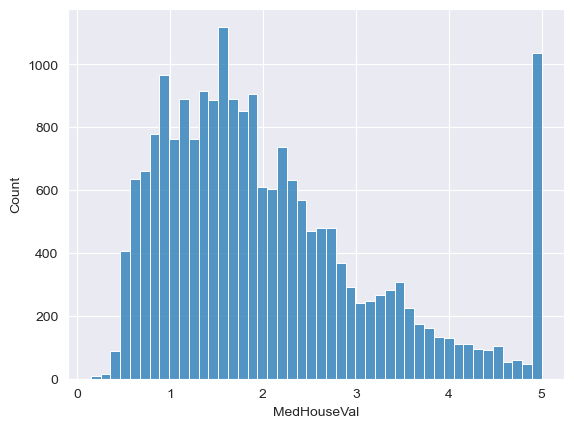

In [7]:
sns.histplot(df, x='MedHouseVal')

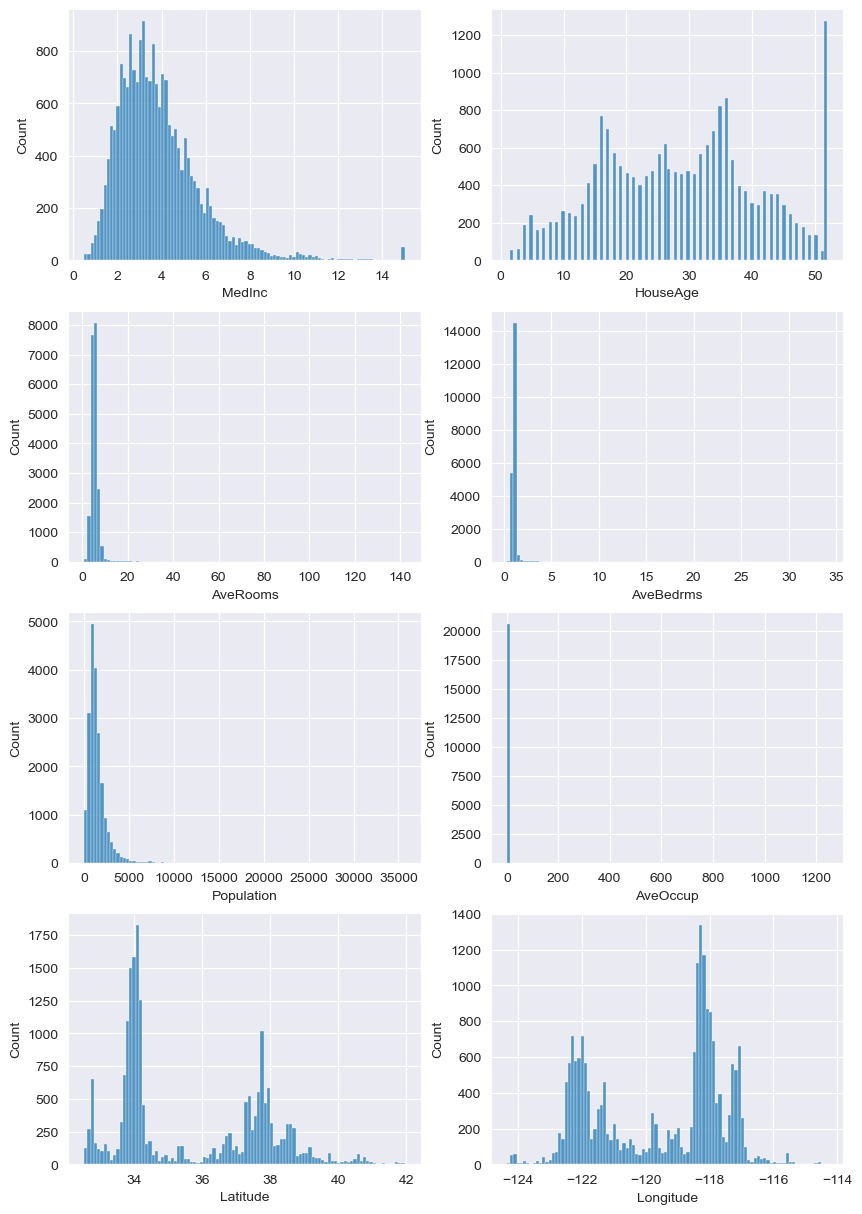

In [8]:
fig, axes = plt.subplots(4,2,figsize=(10,15))
axes_flat = axes.flatten()
for ix, feat in enumerate(data.feature_names):
    sns.histplot(df, x=feat,  bins=100, ax=axes_flat[ix])

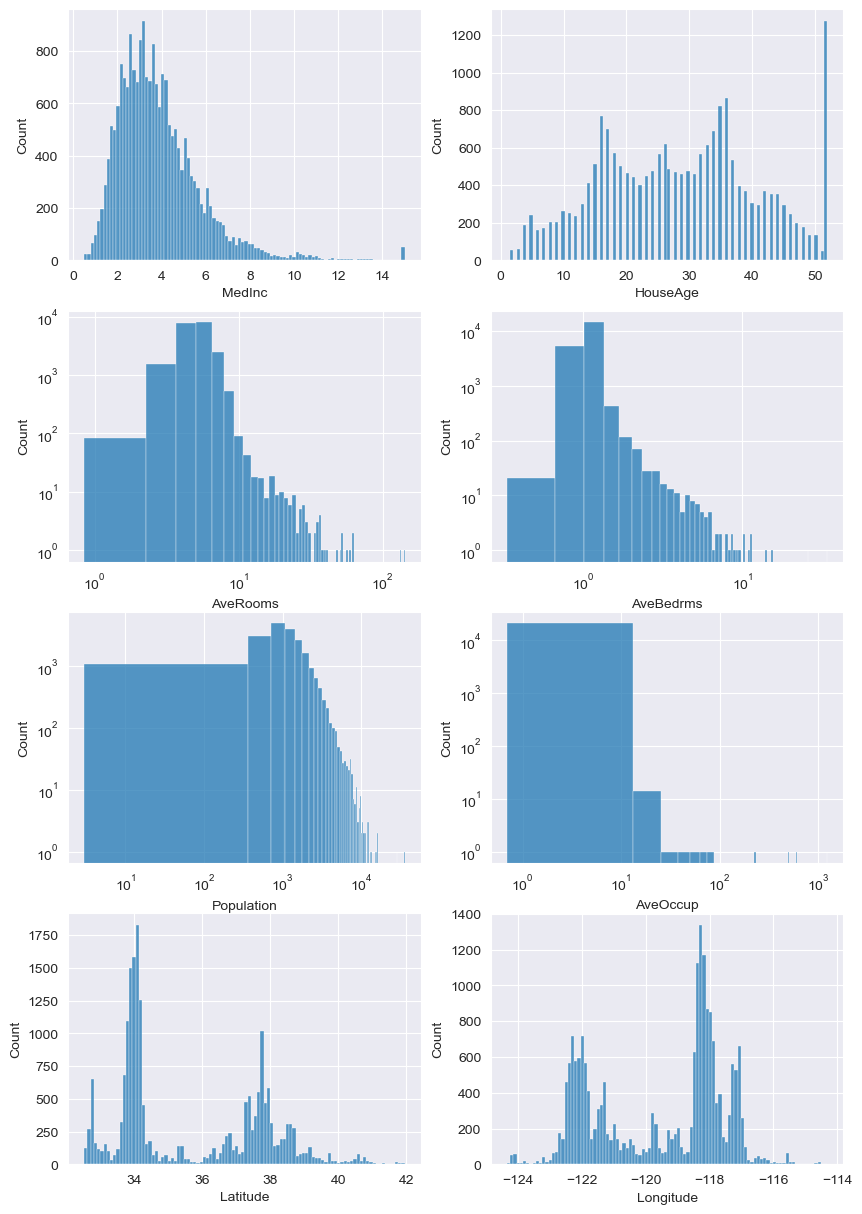

In [9]:
axes_flat[2].set_yscale('log')
axes_flat[2].set_xscale('log')
axes_flat[3].set_yscale('log')
axes_flat[3].set_xscale('log')
axes_flat[4].set_yscale('log')
axes_flat[4].set_xscale('log')
axes_flat[5].set_yscale('log')
axes_flat[5].set_xscale('log')

fig

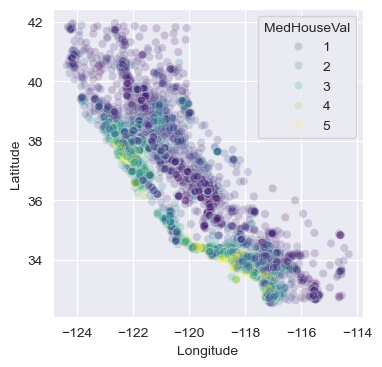

In [10]:
fig = plt.figure(figsize=(4,4))
_ = sns.scatterplot(
    df,
    x="Longitude",
    y="Latitude",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.2
)

### Data Clipping

In [11]:
df.AveRooms = df.AveRooms.clip(0,30)
df.AveBedrms = df.AveBedrms.clip(0,6)
df.Population = df.Population.clip(0, 10_000)
df.AveOccup = df.AveOccup.clip(0, 10)

### Correlation Plots

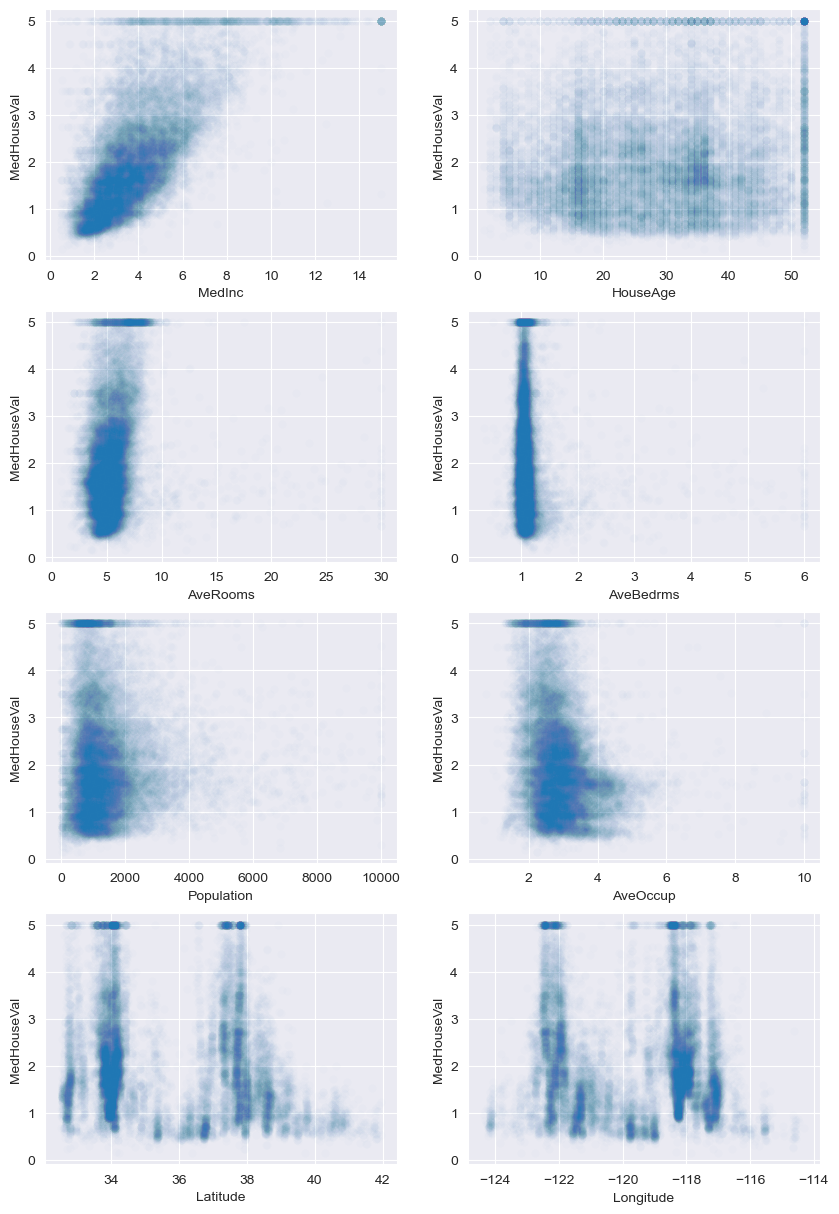

In [12]:
fig, axes = plt.subplots(4,2,figsize=(10,15))
axes_flat = axes.flatten()
for ix, feat in enumerate(data.feature_names):
    sns.scatterplot(df, x=feat, y='MedHouseVal', ax=axes_flat[ix], alpha=0.01)

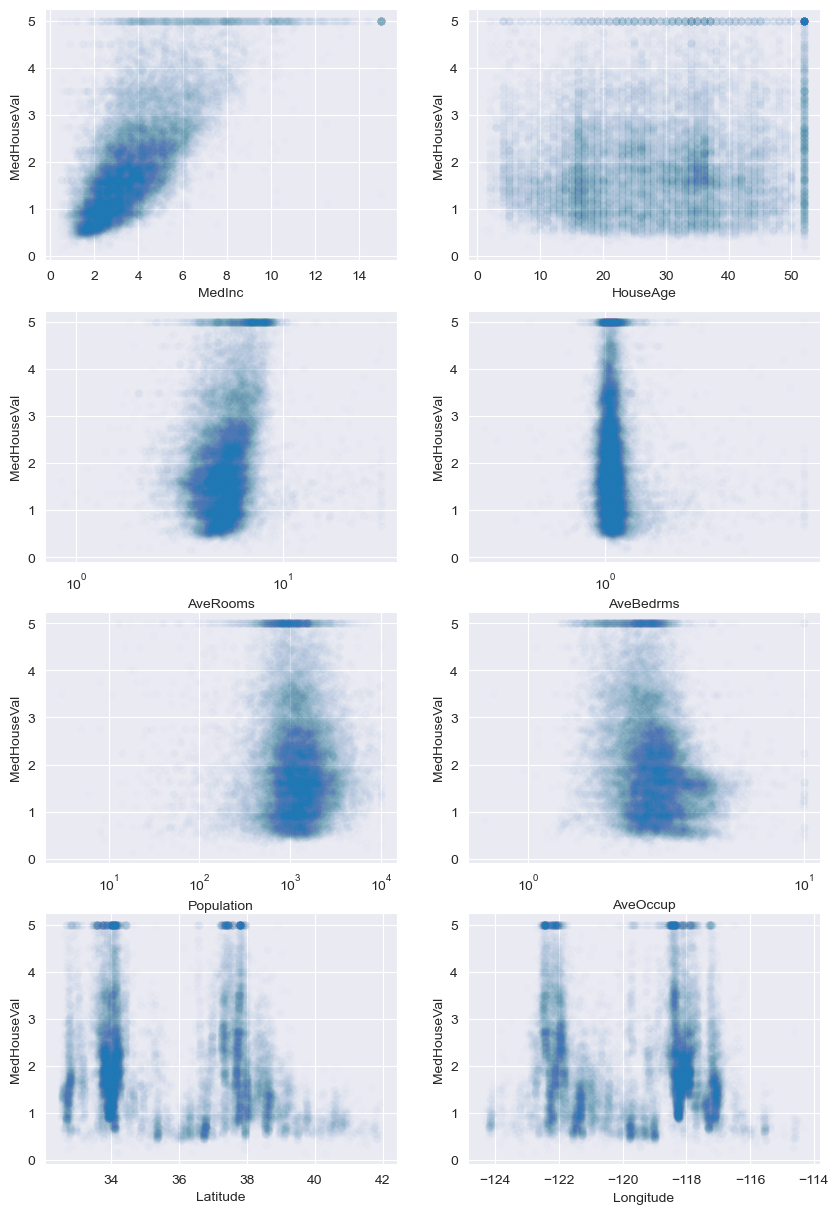

In [13]:
axes_flat[2].set_xscale('log')
axes_flat[3].set_xscale('log')
axes_flat[4].set_xscale('log')
axes_flat[5].set_xscale('log')

fig

## Model Fitting

In [14]:
from sklearn.pipeline import Pipeline

import sklearn.preprocessing

import sklearn.model_selection as skms
import sklearn.metrics as skm
import sklearn.linear_model as skl


In [14]:
results = []

alphas = np.logspace(-4, 1, 10)
degrees = [3, 4, 5, 6, 7]
folds = [2, 5, 10]
regTypes = ['ridge', 'lasso', 'linreg']

for regType in regTypes:
    print(f"Running model: {regType}")
    for fold in folds:
        for degree in degrees:
            for alpha in tqdm(alphas, desc=f"{regType} - folds:{fold} degree:{degree}"):

                if regType == 'ridge':
                    pipeline = Pipeline([
                        ('polyBase', sklearn.preprocessing.PolynomialFeatures(degree=degree, include_bias=False)),
                        ('scale', sklearn.preprocessing.StandardScaler()),
                        ('ridge', skl.Ridge(alpha=alpha, fit_intercept=True))
                    ])
                elif regType == 'lasso':
                    pipeline = Pipeline([
                        ('polyBase', sklearn.preprocessing.PolynomialFeatures(degree=degree, include_bias=False)),
                        ('scale', sklearn.preprocessing.StandardScaler()),
                        ('lasso', skl.Lasso(alpha=alpha, fit_intercept=True, max_iter=10000))
                    ])
                else:
                    pipeline = Pipeline([
                        ('polyBase', sklearn.preprocessing.PolynomialFeatures(degree=degree, include_bias=False)),
                        ('scale', sklearn.preprocessing.StandardScaler()),
                        ('linReg', skl.LinearRegression(fit_intercept=True))
                    ])

                results_cv = skms.cross_validate(
                    pipeline,
                    X=df[data.feature_names],
                    y=df['MedHouseVal'],
                    cv=skms.KFold(n_splits=fold, shuffle=True, random_state=42),
                    scoring='r2',
                    return_train_score=True,
                    n_jobs=-1
                )

                results.append({
                    'regType': regType,
                    'folds': fold,
                    'degree': degree,
                    'alpha': alpha if regType != 'linreg' else np.nan,
                    'train_score': results_cv['train_score'].mean(),
                    'test_score': results_cv['test_score'].mean()
                })

Running model: ridge


ridge - folds:2 degree:7:  70%|███████   | 7/10 [04:14<01:40, 33.45s/it]Exception ignored in: <function ResourceTracker.__del__ at 0x103087920>
Traceback (most recent call last):
  File "/Users/georgigerov/miniconda3/envs/ai-class/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Users/georgigerov/miniconda3/envs/ai-class/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/Users/georgigerov/miniconda3/envs/ai-class/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
ridge - folds:2 degree:7:  80%|████████  | 8/10 [04:39<01:01, 30.61s/it]Exception ignored in: <function ResourceTracker.__del__ at 0x102c53920>
Traceback (most recent call last):
  File "/Users/georgigerov/miniconda3/envs/ai-class/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/Users/georgigerov/miniconda3/envs/ai-class/lib/python3.12/multiprocessing/resour

KeyboardInterrupt: 

In [15]:
# create dataframe from results
results_df = pd.DataFrame(results)
results_df.to_csv()

',regType,folds,degree,alpha,train_score,test_score\n0,ridge,2,3,0.0001,0.7532185028266486,0.7125856320924564\n1,ridge,2,3,0.00035938136638046257,0.7527563825366389,0.7125665510757464\n2,ridge,2,3,0.001291549665014884,0.7520597616809495,0.7125858661211131\n3,ridge,2,3,0.004641588833612782,0.751038164831417,0.712847714832656\n4,ridge,2,3,0.016681005372000592,0.7497026802549762,0.7139960835692954\n5,ridge,2,3,0.05994842503189409,0.747993687820221,0.7183961587959327\n6,ridge,2,3,0.21544346900318845,0.745555054992032,0.724467379710489\n7,ridge,2,3,0.7742636826811278,0.7414766549483566,0.7259930180727809\n8,ridge,2,3,2.782559402207126,0.7356272198351888,0.7233704461327126\n9,ridge,2,3,10.0,0.7297047464691628,0.7197841995951929\n10,ridge,2,4,0.0001,0.778634994604313,0.364127655827613\n11,ridge,2,4,0.00035938136638046257,0.7764978320220973,0.44680419832018675\n12,ridge,2,4,0.001291549665014884,0.774103809804169,0.4963347760586261\n13,ridge,2,4,0.004641588833612782,0.771572160430429,0.51803885

ERROR! Session/line number was not unique in database. History logging moved to new session 34


In [16]:
train_df, test_df = skms.train_test_split(df)

pipeline.fit(train_df[data.feature_names], train_df['MedHouseVal'])

test_df['Prediction'] = pipeline.predict(test_df[data.feature_names])
train_df['Prediction'] = pipeline.predict(train_df[data.feature_names])

KeyboardInterrupt: 

## Evaluation

Text(0.5, 1.0, 'Test data')

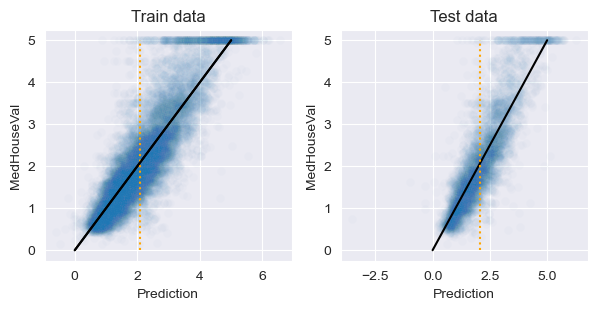

In [20]:
fig, axes = plt.subplots(1,2,figsize=(7,3))

ax = axes[0]
_ = sns.scatterplot(train_df, x='Prediction', y='MedHouseVal', alpha=0.02, ax=ax)
ax.plot([0,5], [0,5], color = 'k')
mean_train = train_df['MedHouseVal'].mean()
ax.plot([mean_train, mean_train], [0, 5], color='orange', ls=':')
ax.plot([0,5], [0,5], color = 'k')

ax.set_title('Train data')

ax = axes[1]
_ = sns.scatterplot(test_df, x='Prediction', y='MedHouseVal', alpha=0.02, ax=ax)
_ = ax.plot([0,5], [0,5], color = 'k')
mean_test = test_df['MedHouseVal'].mean()
ax.plot([mean_test, mean_test], [0, 5], color='orange', ls=':')
ax.set_title('Test data')